In [3]:
import threading
import time
from rich.console import Console
from rich.logging import RichHandler
import logging
import websocket

import requests
import websocket
import json
import time
import os
from dotenv import load_dotenv
from urllib.parse import urlencode
import hmac
import hashlib
import copy

In [4]:
real_time_prices = []

def run_websocket():
    global real_time_prices
    def on_message(ws, message):
        global real_time_prices
        message_ = json.loads(message)
        real_time_prices.append({"t": message_['T'], "p":message_['p']})


    ws = websocket.WebSocketApp("wss://fstream.binance.com/ws/1000pepeusdc@aggTrade", on_message=on_message)

    ws.run_forever()


In [5]:
websocket_thread = threading.Thread(target=run_websocket)
websocket_thread.start()


In [50]:
prices = copy.deepcopy(real_time_prices)

In [51]:
len(prices)

861

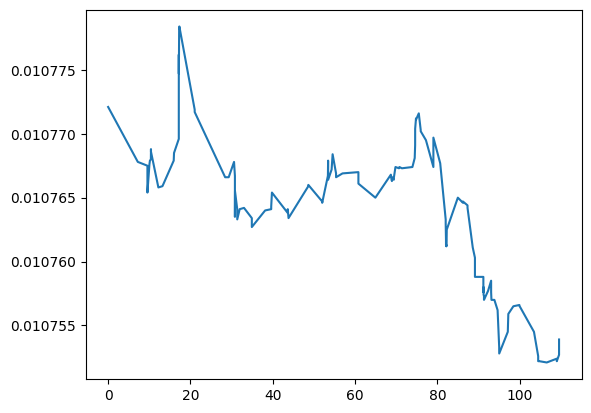

In [10]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot([(float(x['t']) - float(prices[0]['t']))* 10**(-3) for x in prices], [float(x['p']) for x in prices])

In [11]:
prices_list = [float(x['p']) for x in prices]
time_list= [(float(x['t']) - float(prices[0]['t']))* 10**(-3) for x in prices]


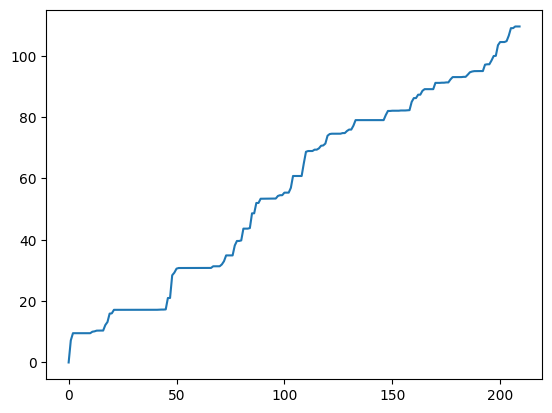

In [12]:
plt.plot(time_list)

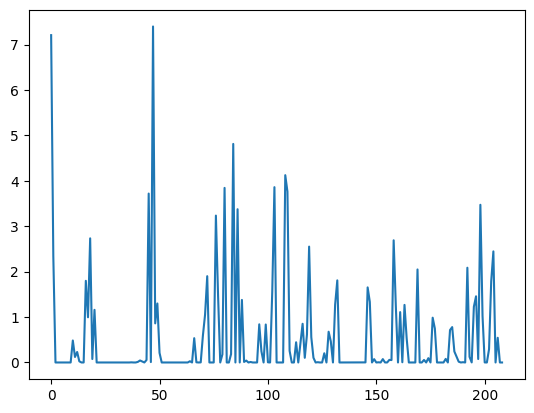

In [13]:
plt.plot([(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))])

In [14]:
[num for num in  [(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))]]

[7.207,
 2.3389999999999995,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.484,
 0.12100000000000044,
 0.23099999999999987,
 0.025000000000000355,
 0.0,
 0.0,
 1.798,
 0.995000000000001,
 2.7329999999999988,
 0.07600000000000051,
 1.158999999999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0030000000000001137,
 0.0,
 0.0,
 0.013000000000001677,
 0.04400000000000048,
 0.021999999999998465,
 0.0,
 0.054999999999999716,
 3.719000000000001,
 0.009000000000000341,
 7.398,
 0.8610000000000007,
 1.2989999999999995,
 0.21099999999999852,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.027000000000001023,
 0.0,
 0.5350000000000001,
 0.004000000000001336,
 0.0,
 0.0019999999999988916,
 0.5899999999999999,
 1.0519999999999996,
 1.8999999999999986,
 0.0,
 0.0,
 0.0,
 3.2340000000000018,
 1.4739999999999966,
 0.0,
 0.17900000000000205,
 3.844000000000001,
 0.0,
 0.0,
 0.18500000000000227,
 4.811999999999

(array([133.,  10.,   4.,   5.,   0.,   1.,   3.,   5.,   1.,   2.,   2.,
          4.,   0.,   3.,   2.,   1.,   2.,   3.,   2.,   2.,   0.,   1.,
          1.,   0.,   3.,   1.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,
          1.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([0.     , 0.07398, 0.14796, 0.22194, 0.29592, 0.3699 , 0.44388,
        0.51786, 0.59184, 0.66582, 0.7398 , 0.81378, 0.88776, 0.96174,
        1.03572, 1.1097 , 1.18368, 1.25766, 1.33164, 1.40562, 1.4796 ,
        1.55358, 1.62756, 1.70154, 1.77552, 1.8495 , 1.92348, 1.99746,
        2.07144, 2.14542, 2.2194 ,

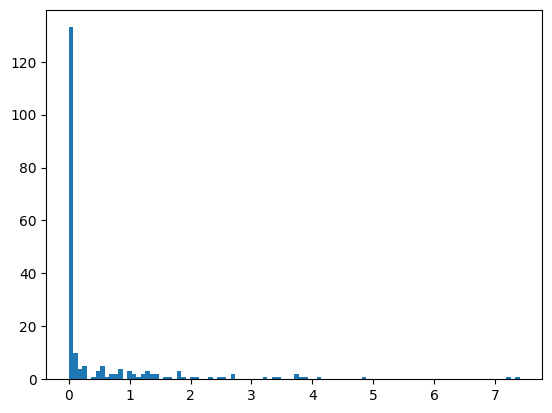

In [15]:

plt.hist(  [num for num in  [(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))]] , bins=100)


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  1.,
         1.,  0.,  1.,  2.,  1.,  2.,  1.,  3.,  0.,  1.,  0.,  5.,  2.,
         3.,  5.,  6., 12., 17.,  0., 35.,  4., 36., 13.,  8.,  2.,  3.,
         2.,  3.,  0.,  8.,  4.,  2.,  4.,  3.,  1.,  0.,  0.,  0.,  0.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  2.]),
 array([-6.03057968e-04, -5.94704508e-04, -5.86351048e-04, -5.77997588e-04,
        -5.69644128e-04, -5.61290668e-04, -5.52937207e-04, -5.44583747e-04,
        -5.36230287e-04, -5.27876827e-04, -5.19523367e-04, -5.11169907e-04,
        -5.02816447e-04, -4.94462987e-04, -4.86109527e-04, -4.77756067e-04,
        -4.69402607e-04, -4.61049147e-04, -4.52695687e-04, -4.44342227e-04,
        -4.35988767e-04, -4.27635307e-04, -4.19281847e

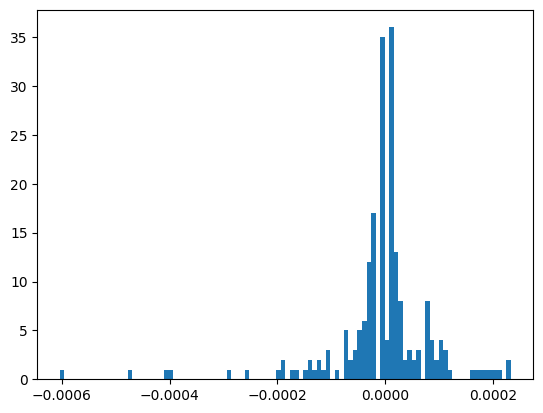

In [16]:
plt.hist([(prices_list[i] / prices_list[i - 1] - 1) for i in range(1, len(prices_list))], bins=100)

In [17]:
data = [[(float(x['t']) - float(prices[0]['t'])) * 10**(-3) , float(x['p'])]for x in prices]

In [18]:
# 计算价格变化达到2%所需的时间
result = []

# 遍历每个时间点
for i in range(len(data)):
    start_time, start_price = data[i]
    found = False
    
    # 遍历后续时间点
    for j in range(i + 1, len(data)):
        current_time, current_price = data[j]
        
        # 计算价格变化百分比
        price_change = (current_price - start_price) / start_price
        
        # 检查价格变化是否达到2%
        if abs(price_change) >= 0.0015:
            time_diff = current_time - start_time
            result.append([start_time, start_price, time_diff])
            found = True
            break
    
    # 如果在后续时间点中没有找到达到2%的变化
    if not found:
        result.append([start_time, start_price, None])


(array([157.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   1.,   2.,   3.,
          5.,   0.,   0.,   0.,   0.,   4.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
          0.,   8.,   0.,   0.,   1.,  12.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          4.]),
 array([-1.00000e+00, -4.13000e-02,  9.17400e-01,  1.87610e+00,
         2.83480e+00,  3.79350e+00,  4.75220e+00,  5.71090e+00,
         6.66960e+00,  7.62830e+00,  8.58700e+00,  9.54570e+00,
         1.05044e+01,  1.14631e+01,  1.24218e+01,  1.33805e+01,
         1.43392e+01,  1.52979e+01,  1.62566e+01,  1.72153e+01

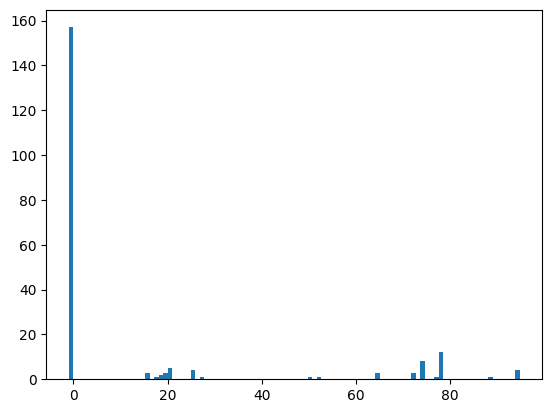

In [19]:
plt.hist([-1 if x is None else x for x in np.array(result)[:,-1]], bins=100)

In [20]:
price_list = prices_list

In [21]:
result = []


# 遍历每个价格
for i in range(len(prices)):
    start_time = float(prices[i]['t'])
    start_price = float(prices[i]['p'])
    trend_up = None
    step_count = 0
    total_percentage_change = 0
    duration = 0  # 初始化持续时间
    
    # 遍历后续价格
    for j in range(i + 1, len(prices)):
        current_time = float(prices[j]['t'])
        current_price = float(prices[j]['p'])
        percentage_change = (current_price - start_price) / start_price
        
        # 如果趋势未定义，定义初始趋势
        if trend_up is None:
            trend_up = percentage_change > 0
        
        # 检查趋势是否反转
        if (percentage_change > 0 and trend_up) or (percentage_change < 0 and not trend_up):
            step_count += 1
            duration = current_time - start_time  # 计算持续时间
            total_percentage_change = (current_price - start_price) / start_price
        else:
            break
    
    result.append([start_time, start_price, step_count, duration * 10**(-3), total_percentage_change])


In [22]:
np.mean(np.array(result)[:, -1])

-7.059842647432717e-05

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,
         2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  2.,  0.,  1.,  0.,  1.,  2.,
         1.,  1.,  1.,  1.,  1.,  2.,  1.,  5.,  6.,  6.,  2.,  9., 13.,
        38., 34., 13.,  4., 13., 11.,  6.,  4.,  0.,  1.,  2.,  2.,  1.,
         2.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,  4.]),
 array([-2.27306465e-03, -2.24429978e-03, -2.21553492e-03, -2.18677005e-03,
        -2.15800519e-03, -2.12924032e-03, -2.10047546e-03, -2.07171059e-03,
        -2.04294573e-03, -2.01418086e-03, -1.98541600e-03, -1.95665113e-03,
        -1.92788627e-03, -1.89912140e-03, -1.87035654e-03, -1.84159167e-03,
        -1.81282681e-03, -1.78406194e-03, -1.75529708e-03, -1.72653221e-03,
        -1.69776735e-03, -1.66900248e-03, -1.64023761e

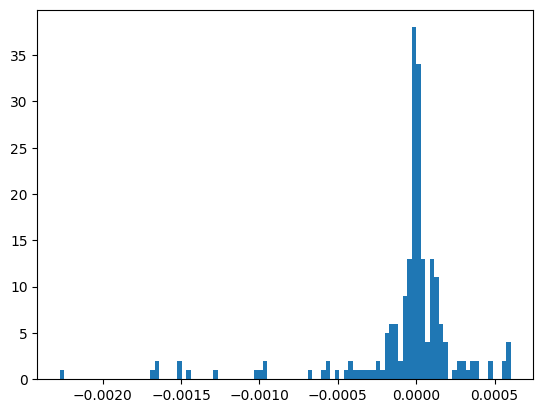

In [23]:
plt.hist(np.array(result)[:, -1], bins= 100)

(array([ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
         0.,  3.,  1.,  1.,  1.,  1.,  4.,  2.,  2.,  2.,  0.,  1.,  1.,
         2.,  3.,  4.,  3.,  4.,  6., 12., 10., 16.,  5., 15.,  7.,  7.,
         6.,  3.,  4.,  1.,  1.,  2.,  2.,  5.,  6.,  4.,  6.,  1.,  1.,
         4.,  1.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-4.55441127e-04, -4.46059924e-04, -4.36678720e-04, -4.27297516e-04,
        -4.17916313e-04, -4.08535109e-04, -3.99153905e-04, -3.89772701e-04,
        -3.80391498e-04, -3.71010294e-04, -3.61629090e-04, -3.52247887e-04,
        -3.42866683e-04, -3.33485479e-04, -3.24104276e-04, -3.14723072e-04,
        -3.05341868e-04, -2.95960665e-04, -2.86579461e-04, -2.77198257e-04,
        -2.67817054e-04, -2.58435850e-04, -2.49054646e

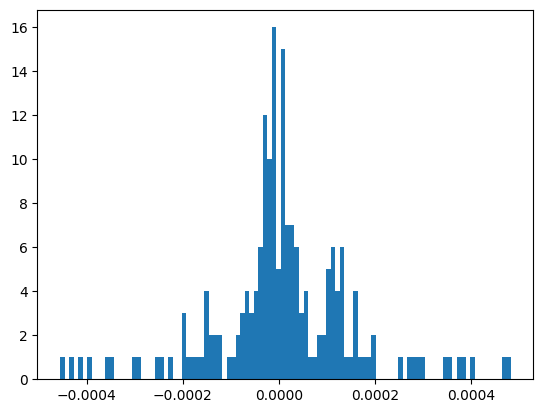

In [24]:
plt.hist([num for num in np.array(result)[:, -1] if -0.0005 <= num <= 0.0005], bins=100)

(array([48.,  0.,  1.,  0., 13.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.     , 0.00042, 0.00084, 0.00126, 0.00168, 0.0021 , 0.00252,
        0.00294, 0.00336, 0.00378, 0.0042 , 0.00462, 0.00504, 0.00546,
        0.00588, 0.0063 , 0.00672, 0.00714, 0.00756, 0.00798, 0.0084 ,
        0.00882, 0.00924, 0.00966, 0.01008, 0.0105 , 0.01092, 0.01134,
        0.01176, 0.01218, 0.0126 , 0.01302, 0.01344, 0.01386, 0.01428,
        0.0147 , 0.01512, 0.01554, 0.01596, 0.01638, 0.0168 , 0.01722,
        

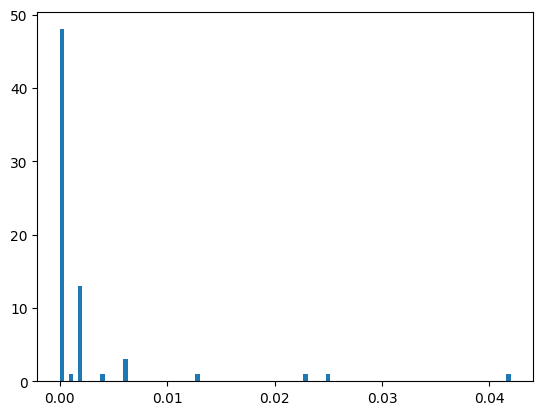

In [25]:
plt.hist([num for num in np.array(result)[:, 3] if num < 0.05], bins=100)

(array([ 5., 39., 20., 20., 10., 12.,  9.,  8.,  4.,  6.,  8.,  5.,  3.,
         3.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  2.,  1.,  0.,  2.,
         1.,  2.,  2.,  3.,  2.,  2.,  1.,  1.,  1.,  0.,  2.,  3.,  1.,
         1.,  1.,  0.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  1.]),
 array([ 0.  ,  0.96,  1.92,  2.88,  3.84,  4.8 ,  5.76,  6.72,  7.68,
         8.64,  9.6 , 10.56, 11.52, 12.48, 13.44, 14.4 , 15.36, 16.32,
        17.28, 18.24, 19.2 , 20.16, 21.12, 22.08, 23.04, 24.  , 24.96,
        25.92, 26.88, 27.84, 28.8 , 29.76, 30.72, 31.68, 32.64, 33.6 ,
        34.56, 35.52, 36.48, 37.44, 38.4 , 39.36, 40.32, 41.28, 42.24,
        43.2 , 44.16, 45.12, 46.08, 47.04, 48.  ]),
 <BarContainer object of 50 artists>)

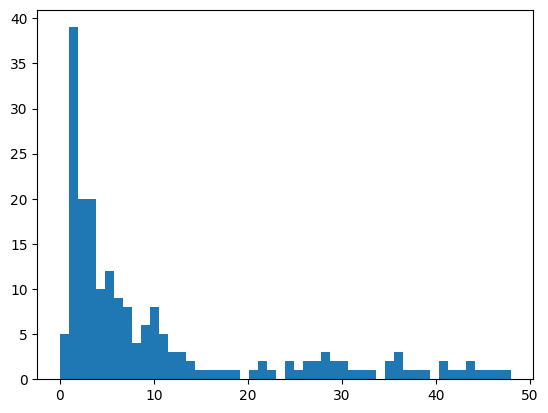

In [26]:
plt.hist([num for num in np.array(result)[:, 2] if num < 50], bins=50)

In [27]:
# 要多少时间才能达成一次网格交易
amplitude_threshold = 0.0005
durations = []
n = len(prices)

for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) 
    found_high = False
    found_low = False

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) 

        price_change = ((current_price - start_price) / start_price) 

        if price_change >= amplitude_threshold:
            found_high = True
        if price_change <= -amplitude_threshold:
            found_low = True

        if found_high and found_low:
            durations.append({'start_time': start_time, 'duration': current_time - start_time})
            break

    if not (found_high and found_low):
        durations.append({'start_time': start_time, 'duration': None})


In [28]:
durations

[{'start_time': 1719232027.549, 'duration': 17.25},
 {'start_time': 1719232034.756, 'duration': 74.88199996948242},
 {'start_time': 1719232037.095, 'duration': 72.54299998283386},
 {'start_time': 1719232037.095, 'duration': 72.54699993133545},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.095, 'duration': 79.57699990272522},
 {'start_time': 1719232037.579, 'duration': 72.05900001525879},
 {'start_time': 1719232037.7, 'duration': 71.93799996376038},
 {'start_time': 1719232037.931, 'duration': 71.70700001716614},
 {'start_time': 1719232037.956, 'duration': 20.960999965667725},
 {'start_time': 1719232037.956, 'duration': 20.963000

In [29]:
with open('result.json', 'w') as file:
    json.dump(durations, file, indent=4)


In [30]:
# 单边需要多少时间达到阈值
threshold = 0.002
durations = []
n = len(prices)

for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) 
    found = False

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) 

        price_change = ((current_price - start_price) / start_price)

        if abs(price_change) >= threshold:
            durations.append({'start_time': start_time, 'duration': current_time - start_time})
            found = True
            break

    if not found:
        durations.append({'start_time': start_time, 'duration': None})



In [31]:
durations

[{'start_time': 1719232027.549, 'duration': None},
 {'start_time': 1719232034.756, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.095, 'duration': None},
 {'start_time': 1719232037.579, 'duration': None},
 {'start_time': 1719232037.7, 'duration': None},
 {'start_time': 1719232037.931, 'duration': None},
 {'start_time': 1719232037.956, 'duration': None},
 {'start_time': 1719232037.956, 'duration': None},
 {'start_time': 1719232037.956, 'duration': None},
 {'start_time': 1719232039.754, 'duration': None},
 {'start_time': 1719232040.749, 'duration': None},
 {'start_time': 1719232043.482, '

In [32]:
threshold = 0.001
durations = []
n = len(prices)

for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p']) 
    found_up = False
    found_down = False

    up_duration = None
    down_duration = None

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p']) 

        price_change = ((current_price - start_price) / start_price)

        if not found_up and price_change >= threshold:
            up_duration = current_time - start_time
            found_up = True

        if not found_down and price_change <= -threshold:
            down_duration = current_time - start_time
            found_down = True

        if found_up and found_down:
            break

    durations.append({'start_time': start_time, 'up_duration': up_duration, 'down_duration': down_duration})


In [40]:
with open('result.json', 'w') as file:
    json.dump(durations, file, indent=4)


In [60]:
# 不考虑回撤

# 定义阈值
initial_threshold = 0.0002  # 万分之一
final_threshold = 0.001  # 千分之二

# 存储结果的列表
durations = []

# 数据的长度
n = len(prices)

# 遍历每个起始点
for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p'])

    # 初始化标志和变量
    found_initial = False
    initial_time = None
    initial_price = None
    direction = None

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p'])
        price_change = (current_price - start_price) / start_price

        if not found_initial:
            if price_change >= initial_threshold:
                found_initial = True
                initial_time = current_time
                initial_price = current_price
                direction = 'up'
            elif price_change <= -initial_threshold:
                found_initial = True
                initial_time = current_time
                initial_price = current_price
                direction = 'down'
        else:
            if direction == 'up':
                final_price_change = (current_price - initial_price) / initial_price
                if final_price_change >= final_threshold:
                    durations.append({'start_time': start_time, 'duration': current_time - initial_time, 'direction': direction})
                    break
                elif (current_price - start_price) / start_price <= initial_threshold:
                    # durations.append({'start_time': start_time, 'duration': None, 'direction': direction})
                    pass
                    break
            elif direction == 'down':
                final_price_change = (current_price - initial_price) / initial_price
                if final_price_change <= -final_threshold:
                    durations.append({'start_time': start_time, 'duration': current_time - initial_time, 'direction': direction})
                    break
                elif (current_price - start_price) / start_price >= initial_threshold:
                    # durations.append({'start_time': start_time, 'duration': None, 'direction': direction})
                    pass
                    break

    # 如果没有找到符合条件的最终结果，记录结果为 None
    if found_initial and j == n - 1:
        durations.append({'start_time': start_time, 'duration': None, 'direction': direction})


In [61]:
sum(1 for d in durations if d['duration'] is not None) / len(durations)

0.9338235294117647

In [36]:
# 考虑回撤

# 定义阈值
initial_threshold = 0.0005  # 万分之一
final_threshold = 0.001  # 千分之二

# 存储结果的列表
durations = []

# 数据的长度
n = len(prices)

# 遍历每个起始点
for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p'])

    # 初始化标志和变量
    found_initial = False
    initial_time = None
    initial_price = None
    direction = None

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p'])
        price_change = (current_price - start_price) / start_price

        if not found_initial:
            if price_change >= initial_threshold:
                found_initial = True
                initial_time = current_time
                initial_price = current_price
                direction = 'up'
            elif price_change <= -initial_threshold:
                found_initial = True
                initial_time = current_time
                initial_price = current_price
                direction = 'down'
        else:
            if direction == 'up':
                final_price_change = (current_price - initial_price) / initial_price
                if final_price_change >= final_threshold:
                    durations.append({'start_time': start_time, 'duration': current_time - initial_time, 'direction': direction})
                    break
                elif (current_price - start_price) / start_price <= initial_threshold:
                    durations.append({'start_time': start_time, 'duration': None, 'direction': direction})
                    pass
                    break
            elif direction == 'down':
                final_price_change = (current_price - initial_price) / initial_price
                if final_price_change <= -final_threshold:
                    durations.append({'start_time': start_time, 'duration': current_time - initial_time, 'direction': direction})
                    break
                elif (current_price - start_price) / start_price >= initial_threshold:
                    durations.append({'start_time': start_time, 'duration': None, 'direction': direction})
                    pass
                    break

    # 如果没有找到符合条件的最终结果，记录结果为 None
    if found_initial and j == n - 1:
        durations.append({'start_time': start_time, 'duration': None, 'direction': direction})


In [37]:
sum(1 for d in durations if d['duration'] is not None) / len(durations)

0.18333333333333332

In [58]:
# 探究网格交易，但是不能单边过多
# 定义阈值

amplitude_threshold = 0.0005  # 万分之五
max_single_direction_threshold = 0.01  # 千分之八

# 存储结果的列表
durations = []

# 数据的长度
n = len(prices)

# 遍历每个起始点
for i in range(n):
    start_time = float(prices[i]['t']) * 10**(-3)
    start_price = float(prices[i]['p'])
    found_high = False
    found_low = False
    direction = None

    for j in range(i + 1, n):
        current_time = float(prices[j]['t']) * 10**(-3)
        current_price = float(prices[j]['p'])

        price_change = (current_price - start_price) / start_price

        if not found_high and not found_low:
            if price_change >= amplitude_threshold:
                found_high = True
                direction = 'up-down'
                high_price = current_price
            elif price_change <= -amplitude_threshold:
                found_low = True
                direction = 'down-up'
                low_price = current_price
        else:
            if found_high:
                if (current_price - high_price) / high_price >= max_single_direction_threshold:
                    break
                if price_change <= -amplitude_threshold:
                    found_low = True
                    durations.append({'start_time': start_time, 'duration': current_time - start_time, 'direction': direction})
                    break
            elif found_low:
                if (low_price - current_price) / low_price >= max_single_direction_threshold:
                    break
                if price_change >= amplitude_threshold:
                    found_high = True
                    durations.append({'start_time': start_time, 'duration': current_time - start_time, 'direction': direction})
                    break

    if not (found_high and found_low):
        durations.append({'start_time': start_time, 'duration': None, 'direction': direction})


In [59]:
sum(1 for d in durations if d['duration'] is not None) / len(durations)

0.7084785133565621